In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
import joblib

# ------------------------------------------------
# STEP 1: Load TEST data (same as Phase 7.1)
# ------------------------------------------------
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").values.ravel()

# ------------------------------------------------
# STEP 2: Load BEST model again
# ------------------------------------------------
model = joblib.load("../models/gradient_boosting.pkl")

# ------------------------------------------------
# STEP 3: Stratified 5-Fold Cross Validation
# ------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    model,
    X_test,
    y_test,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC-AUC scores:", scores)
print("Mean ROC-AUC:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-validation ROC-AUC scores: [0.75340136 0.79931973 0.66839827 0.67748918 0.70993031]
Mean ROC-AUC: 0.721707769582334
Standard Deviation: 0.04891624485477785


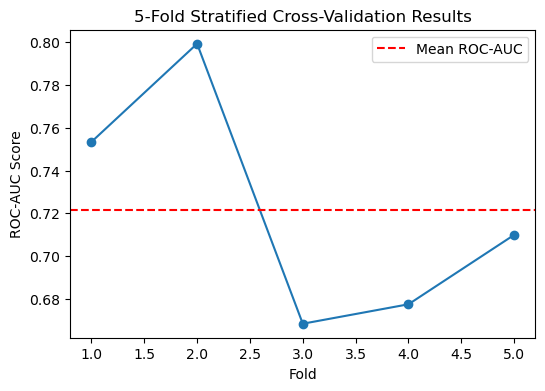

In [8]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), scores, marker='o')
plt.axhline(scores.mean(), linestyle='--', color='red', label='Mean ROC-AUC')
plt.xlabel("Fold")
plt.ylabel("ROC-AUC Score")
plt.title("5-Fold Stratified Cross-Validation Results")
plt.legend()
plt.show()
